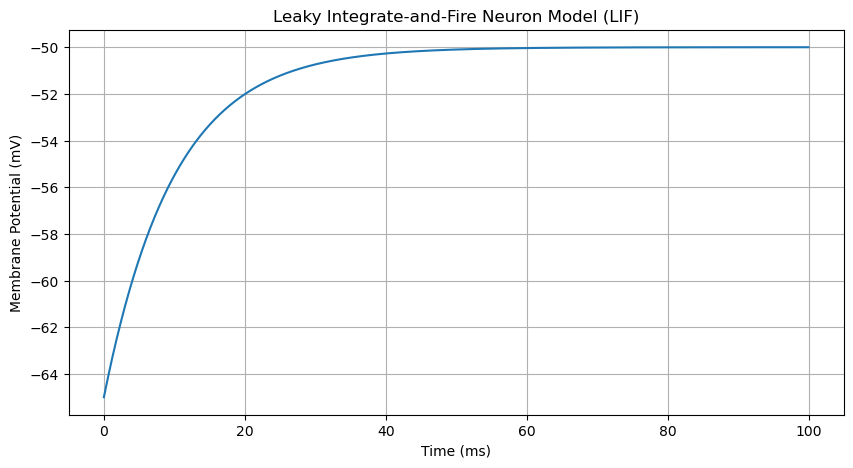

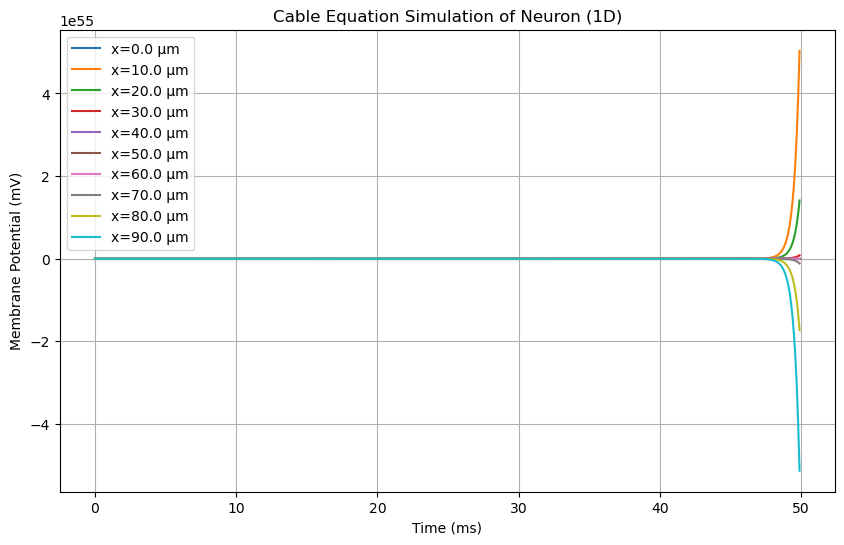

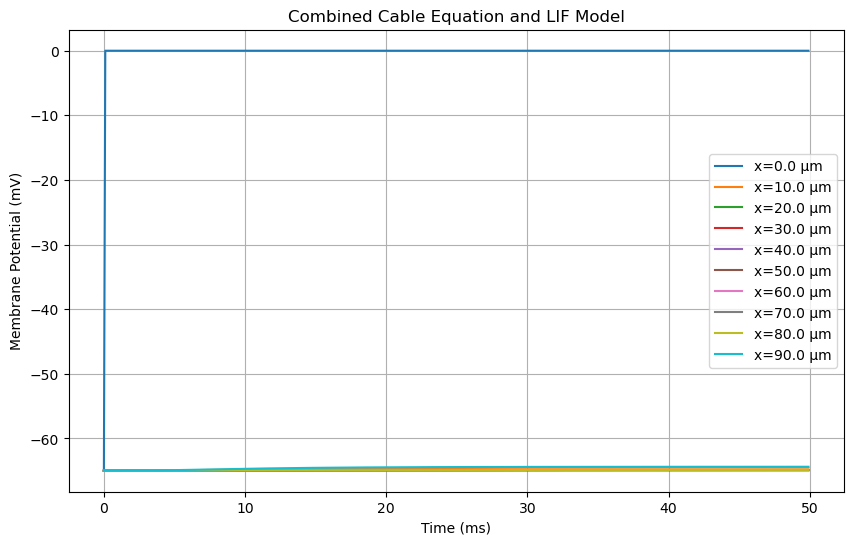

In [1]:
# 导入所需的库
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# 1. 单腔体模型（LIF神经元模型）实现

# 参数
C_m = 1.0  # 膜电容（单位：μF）
R_m = 10.0  # 膜电阻（单位：MΩ）
V_rest = -65.0  # 静息电位（单位：mV）
V_th = -50.0  # 阈值电位（单位：mV）
V_reset = -65.0  # 重置电位（单位：mV）
I_ext = 1.5  # 外部电流（单位：μA）

# 时间参数
t_start = 0.0  # 起始时间（单位：ms）
t_end = 100.0  # 结束时间（单位：ms）
dt = 0.1  # 时间步长（单位：ms）

# 初始化时间
time = np.arange(t_start, t_end, dt)

# 膜电位数组
V = np.zeros(len(time))  # 存储膜电位
V[0] = V_rest  # 初始膜电位

# LIF模型计算
for i in range(1, len(time)):
    dV = (-(V[i-1] - V_rest) + I_ext * R_m) / (R_m * C_m) * dt
    V[i] = V[i-1] + dV

    # 如果膜电位超过阈值，则触发动作电位并重置
    if V[i] >= V_th:
        V[i] = V_reset

# 绘制LIF模型的膜电位图
plt.figure(figsize=(10, 5))
plt.plot(time, V)
plt.title("Leaky Integrate-and-Fire Neuron Model (LIF)")
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.grid(True)
plt.show()

# 2. 电缆方程实现（1D模型）

# 参数
L = 100.0  # 神经元长度（单位：μm）
R_m = 1.0  # 膜电阻（单位：Ω·μm²）
C_m = 1.0  # 膜电容（单位：μF·μm²）
I_ext = 0.1  # 外部电流（单位：μA）

# 网格设置
N = 100  # 空间步数
dx = L / N  # 空间步长
dt = 0.1  # 时间步长（单位：ms）
time_steps = 500  # 时间步数

# 初始化膜电位矩阵
V = np.zeros((N, time_steps))  # 存储膜电位（空间位置x，时间步t）
V[:, 0] = -65.0  # 初始化为静息电位

# 电缆方程的数值解
for t in range(1, time_steps):
    for x in range(1, N-1):
        # 使用差分法离散化电缆方程
        d2V = (V[x-1, t-1] - 2*V[x, t-1] + V[x+1, t-1]) / dx**2
        dV = (I_ext - (V[x, t-1] + R_m * C_m * d2V)) * dt / C_m
        V[x, t] = V[x, t-1] + dV

# 绘制不同位置的膜电位随时间变化的图
plt.figure(figsize=(10, 6))
for i in range(0, N, int(N / 10)):  # 绘制10个位置的电位变化
    plt.plot(np.arange(time_steps) * dt, V[i, :], label=f"x={i * dx:.1f} μm")

plt.title("Cable Equation Simulation of Neuron (1D)")
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.legend()
plt.grid(True)
plt.show()

# 3. 结合LIF和电缆方程

# 对于每个空间位置应用LIF模型，并结合电缆方程进行更新

# 参数设置
tau_m = 10.0  # 膜时间常数（ms）
V_rest = -65.0  # 静息电位
V_th = -50.0  # 阈值电位
V_reset = -65.0  # 重置电位
I_ext = 0.1  # 外部电流（单位：μA）

# 创建空间网格和时间步长
L = 100.0  # 神经元长度（单位：μm）
dx = L / N  # 空间步长
dt = 0.1  # 时间步长（单位：ms）
time_steps = 500  # 时间步数

# 初始化膜电位矩阵
V = np.zeros((N, time_steps))  # 存储膜电位（空间位置x，时间步t）
V[:, 0] = V_rest  # 初始静息电位

# 电缆方程和LIF模型结合的数值求解
for t in range(1, time_steps):
    for x in range(1, N-1):
        # 计算膜电位的二阶空间导数
        d2V = (V[x-1, t-1] - 2*V[x, t-1] + V[x+1, t-1]) / dx**2
        # 电缆方程的更新
        dV = (I_ext - (V[x, t-1] - V_rest)) * dt / tau_m + (d2V * R_m * C_m) * dt
        V[x, t] = V[x, t-1] + dV

        # 应用LIF模型
        if V[x, t] >= V_th:
            V[x, t] = V_reset

# 绘制结合电缆方程和LIF模型后的电位图
plt.figure(figsize=(10, 6))
for i in range(0, N, int(N / 10)):  # 绘制10个位置的电位变化
    plt.plot(np.arange(time_steps) * dt, V[i, :], label=f"x={i * dx:.1f} μm")

plt.title("Combined Cable Equation and LIF Model")
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.legend()
plt.grid(True)
plt.show()
